<h3 align="center"><font size="10">Część 1</font></h3>

In [12]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
seed = 244823
samples = 2423
loop = 100

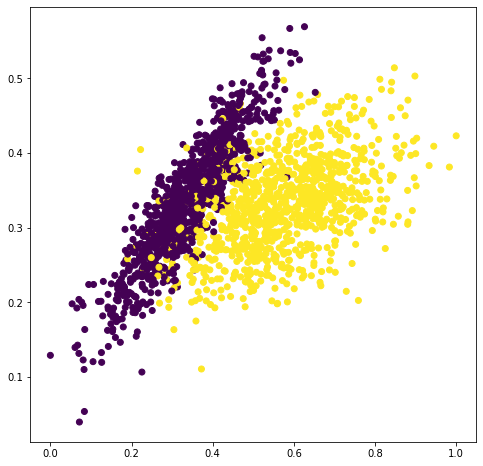

In [13]:
x, y = datasets.make_classification(n_features=2, random_state=seed, n_redundant=0, n_samples=samples, n_clusters_per_class=1, class_sep=1)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, train_size=0.8, random_state=seed)

xx, yy = np.meshgrid(np.arange(0, 1.1, 0.01), np.arange(0, 1.1, 0.01))
xtrain = (xtrain - np.min(xtrain))/(np.max(xtrain)-np.min(xtrain))
ytrain = (ytrain - np.min(ytrain))/(np.max(ytrain)-np.min(ytrain))
xtest = (xtest - np.min(xtest))/(np.max(xtest)-np.min(xtest))
ytest = (ytest - np.min(ytest))/(np.max(ytest)-np.min(ytest))
ytest[ytest == 0] = -1
ytrain[ytrain == 0] = -1
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain)
plt.show()

<h3 align="center"><font size="10">Metoda analityczna</font></h3>

In [14]:
intercepts = np.ones((len(xtrain), 1))
newintercepts = np.c_[intercepts, xtrain]
I = np.identity(newintercepts.shape[1])
I[0][0] = 0
theta = np.linalg.pinv(newintercepts.T.dot(newintercepts) + I).dot(newintercepts.T).dot(ytrain)

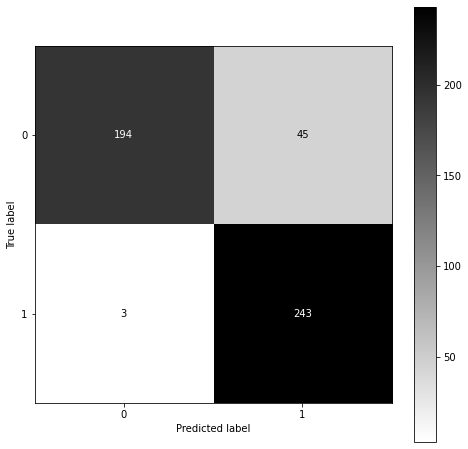

In [15]:
xtestdomacierzy = np.c_[np.ones((xtest.shape[0],1)),xtest]
theta = theta.reshape((3,1))
ypredicted = np.sum(xtestdomacierzy @ theta, axis=1)
labeled=[]
for x in ypredicted:
    if x >= 0:
        labeled.append(1.0)
    else:
        labeled.append(-1.0)
cmanalytical = confusion_matrix(ytest, labeled)
tnanal, fpanal, fnanal, tpanal = confusion_matrix(ytest, labeled).ravel()
cmanalytical[0,0] = tpanal
cmanalytical[1,0] = fpanal
cmanalytical[0,1] = fnanal
cmanalytical[1,1] = tnanal
cmanalytical = ConfusionMatrixDisplay(confusion_matrix=cmanalytical)
cmanalytical.plot(cmap='binary')
plt.show()

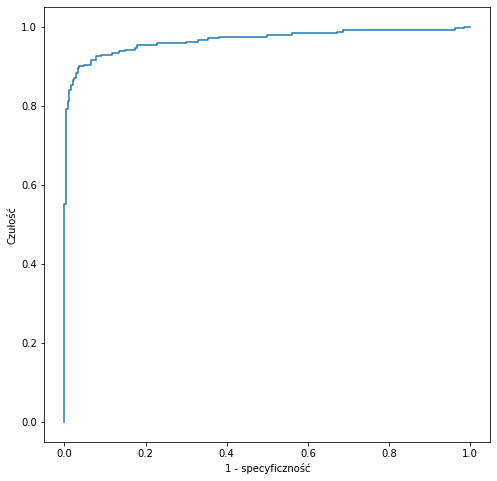

In [16]:
fpr, tpr, tresholds = roc_curve(ytest, ypredicted)
rocowanie = RocCurveDisplay(fpr=fpr, tpr=tpr)
rocowanie.plot()
plt.xlabel('1 - specyficzność')
plt.ylabel('Czułość')
plt.show()

In [17]:
ypredicted = np.c_[np.ones((np.c_[xx.ravel(), yy.ravel()].shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]] @ theta
ypredicted = np.sum(ypredicted, axis=1)
labeled=[]
for x in ypredicted:
    if x >= 0:
        labeled.append(1.0)
    else:
        labeled.append(-1.0)
labeled = np.asarray(labeled)
labeled = labeled.reshape(xx.shape)
# plt.contourf(xx, yy, labeled, alpha=0.4)
# plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain)
# plt.ylim(0,0.7)
# plt.title('Klasyfikacja modelu analitycznego')
# plt.show()
labeled

array([[-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

<h3 align="center"><font size="10">Metoda sklearn</font></h3>

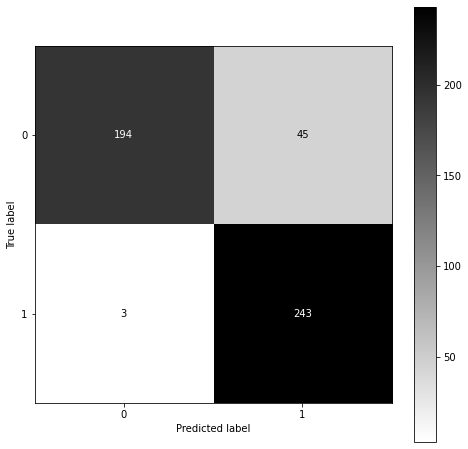

In [18]:
model = linear_model.RidgeClassifier()
model.fit(xtrain, ytrain)
score = model.score(xtrain, ytrain)
ypred = model.predict(xtest)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
cm = confusion_matrix(ytest, ypred)
tnskl, fpskl, fnskl, tpskl = confusion_matrix(ytest, ypred).ravel()
cm[0,0] = tpskl
cm[1,0] = fpskl
cm[0,1] = fnskl
cm[1,1] = tnskl
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot(cmap='binary')
plt.show()

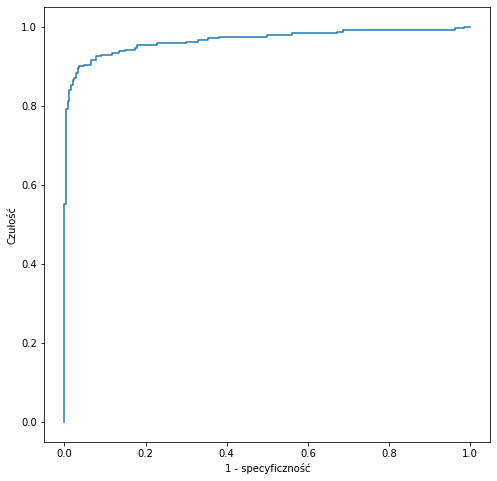

In [19]:
fpr, tpr, tresholds = roc_curve(ytest, model.decision_function(xtest))
rocowanie = RocCurveDisplay(fpr=fpr, tpr=tpr,)
rocowanie.plot()
plt.xlabel('1 - specyficzność')
plt.ylabel('Czułość')
plt.show()

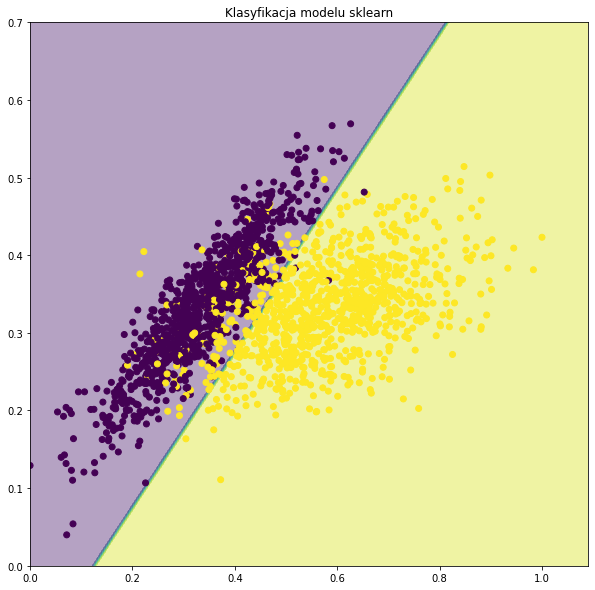

In [20]:
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = [10, 10]
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain)
plt.ylim(0,0.7)
plt.title('Klasyfikacja modelu sklearn')
plt.show()

In [21]:
# szybkość analitycznej
start_time = time.time()
for i in range(100):
    xt = np.transpose(xtrain)
    xtx = np.matmul(xt, xtrain)
    xtxwithlambda = xtx+(0.000001)*np.identity(len(xtx))
    xtxinv = np.linalg.pinv(xtxwithlambda)
    xty = np.matmul(xt, ytrain)
    theta = np.matmul(xtxinv, xty)
    ypredicted = xtest @ theta
end_time_anal = (time.time() - start_time)/loop
# szybkość sklearn
start_time = time.time()
for i in range(100):
    model = linear_model.RidgeClassifier()
    model.fit(xtrain, ytrain)
    score = model.score(xtrain, ytrain)
    ypred = model.predict(xtest)
end_time_skl = (time.time() - start_time)/loop
print(f'The speed of analytical method is {round(end_time_anal*1000, 4)} ms')
print(f'The speed of sklearn method is {round(end_time_skl*1000, 4)} ms')
print(f'The sensitivity of analytical method is {round(tpanal/(tpanal+fnanal), 4)}')
print(f'The sensitivity of sklearn method is {round(tpskl/(tpskl+fnskl), 4)}')
print(f'The specificity of analytical method is {round(tnanal/(tnanal+fpanal), 4)}')
print(f'The specificity of sklearn method is {round(tnskl/(tnskl+fpskl), 4)}')

The speed of analytical method is 0.09 ms
The speed of sklearn method is 1.9404 ms
The sensitivity of analytical method is 0.8117
The sensitivity of sklearn method is 0.8117
The specificity of analytical method is 0.9878
The specificity of sklearn method is 0.9878


<h3 align="center"><font size="10">Część 2</font></h3>

In [22]:
import scipy.stats.mstats as mst
names = ['Age','Sex','CP','Trestbps','Chol','FBS','Restecg','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Class']
cleveland = pd.read_csv('processed.cleveland.data', names=names, header=None)
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')
cleveland = cleveland.dropna()
cleveland.loc[cleveland['Class'] > 0, 'Class'] = 1
cleveland.loc[cleveland['Class'] == 0, 'Class'] = -1
cleveland

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,-1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,-1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [23]:
def mode(x):
    return mst.mode(x,axis=None)[0][0]
miary = {'Age': cleveland['Age'].mean(),
         'Sex': cleveland['Sex'].median(),
         'CP': mode(cleveland['CP']),
         'Trestbps': cleveland['Trestbps'].mean(),
         'Chol': cleveland['Chol'].mean(),
         'FBS': mode(cleveland['FBS']),
         'Restecg': mode(cleveland['Restecg']),
         'Thalach': cleveland['Thalach'].mean(),
         'Exang': mode(cleveland['Exang']),
         'Oldpeak': cleveland['Oldpeak'].mean(),
         'Slope': mode(cleveland['Slope']),
         'Thal': mode(cleveland['Thal']),
         'Ca': mode(cleveland['Ca']),
         'Class': mode(cleveland['Class'])
            }
miary

{'Age': 54.54208754208754,
 'Sex': 1.0,
 'CP': 4.0,
 'Trestbps': 131.69360269360268,
 'Chol': 247.35016835016836,
 'FBS': 0.0,
 'Restecg': 0.0,
 'Thalach': 149.5993265993266,
 'Exang': 0.0,
 'Oldpeak': 1.0555555555555556,
 'Slope': 1.0,
 'Thal': 3.0,
 'Ca': 0.0,
 'Class': -1.0}

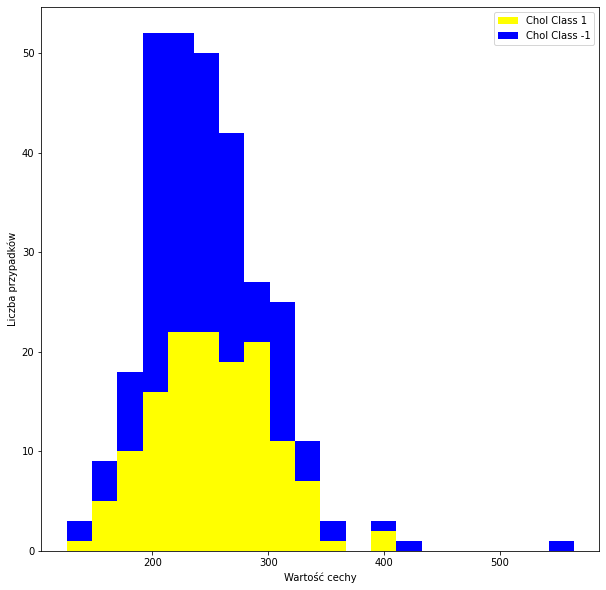

In [24]:
histkolumna = 'Chol' #do uzupełnienia samemu numer kolumny
x,y = [], []
x = cleveland.loc[cleveland['Class'] == 1.0]
y = cleveland.loc[cleveland['Class'] == -1.0]
x = x[histkolumna]
y = y[histkolumna]
plt.hist([x,y], 20, label=[histkolumna + ' Class 1', histkolumna + ' Class -1'], stacked=True, color=['yellow', 'blue'])
plt.legend(loc='upper right')
plt.xlabel('Wartość cechy')
plt.ylabel('Liczba przypadków')
plt.show()

<AxesSubplot:>

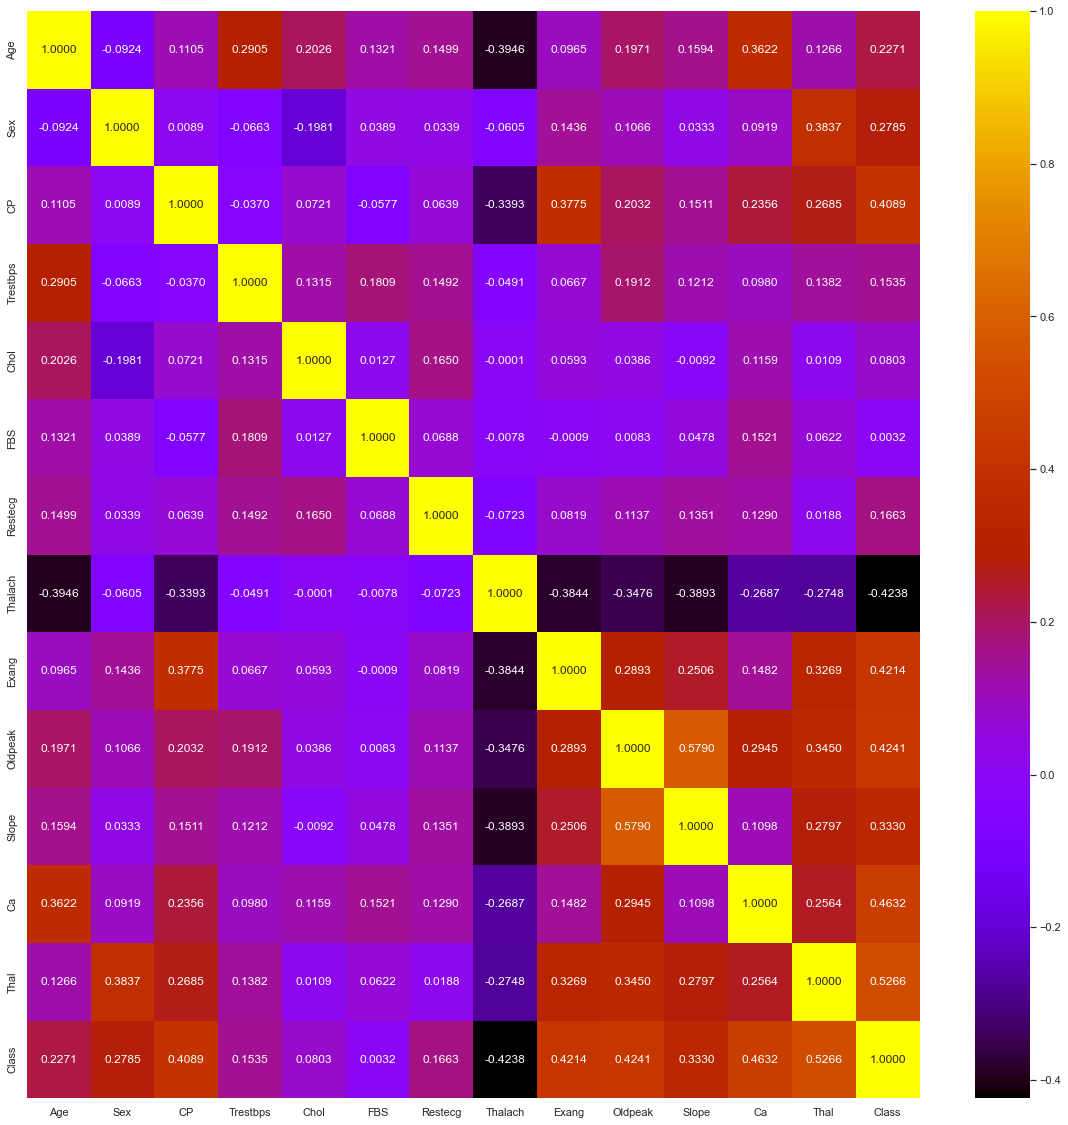

In [25]:
heatmap = cleveland.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(heatmap, annot = True, fmt='.4f', cmap='gnuplot')

 <h3 align="center"><font size="10">Best features for this dataset are Thal, Ca, Oldpeak, Thalach. They do not correlate strongly with themselves.</font></h3>

<h3 align="center"><font size="10">Część 3</font></h3>

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
x = cleveland.drop(columns='Class')
y = cleveland['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=seed)
xtrain = (xtrain - xtrain.min())/(xtrain.max()-xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max()-xtest.min())
ytest[ytest == 0] = -1
ytrain[ytrain == 0] = -1
model = linear_model.RidgeClassifier()
sfsmodel = sfs(model, n_features_to_select=4)
sfsmodel.fit(xtrain, ytrain)
sfsmodel.get_feature_names_out()

array(['CP', 'Exang', 'Ca', 'Thal'], dtype=object)

<font size="10">Best features that sfs chose were CP, Exang, Ca and Thal</font>

<h3 align="center"><font size="10">Confusion matrix of all features in sklearn model</font></h3>

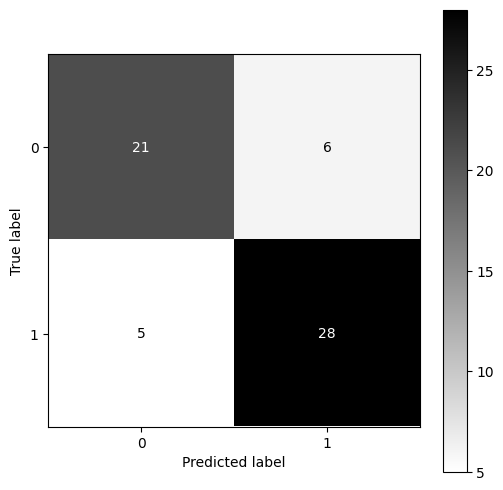

In [27]:
plt.rcdefaults()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)
tnskl, fpskl, fnskl, tpskl = confusion_matrix(ytest, ypred).ravel()
cm[0,0] = tpskl
cm[1,0] = fpskl
cm[0,1] = fnskl
cm[1,1] = tnskl
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.rcParams['figure.figsize'] = [6, 6]
cm.plot(cmap='binary')
plt.show()

<h3 align="center"><font size="10">Confusion matrix of all features in analytical model</font></h3>

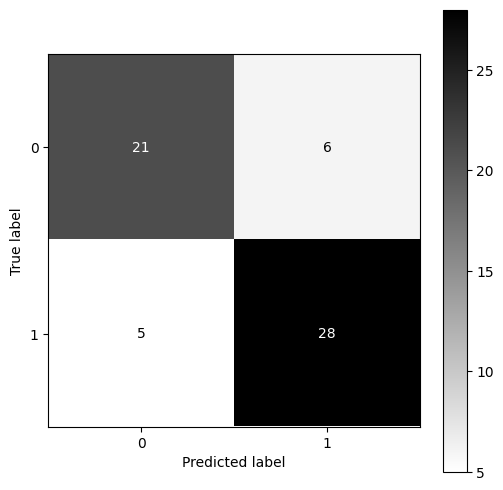

In [28]:
intercepts = np.ones((len(xtrain), 1))
newintercepts = np.c_[intercepts, xtrain]
I = np.identity(newintercepts.shape[1])
I[0][0] = 0
theta = np.linalg.pinv(newintercepts.T.dot(newintercepts) + I).dot(newintercepts.T).dot(ytrain)
xtestdomacierzy = np.c_[np.ones((xtest.shape[0],1)),xtest]
theta = theta.reshape((14,1))
ypredicted = np.sum(xtestdomacierzy @ theta, axis=1)
labeled=[]
for x in ypredicted:
    if x >= 0:
        labeled.append(1.0)
    else:
        labeled.append(-1.0)
cmanalytical = confusion_matrix(ytest, labeled)
tnanal, fpanal, fnanal, tpanal = confusion_matrix(ytest, labeled).ravel()
cmanalytical[0,0] = tpanal
cmanalytical[1,0] = fpanal
cmanalytical[0,1] = fnanal
cmanalytical[1,1] = tnanal
cmanalytical = ConfusionMatrixDisplay(confusion_matrix=cmanalytical)
cmanalytical.plot(cmap='binary')
plt.show()

<h3 align="center"><font size="10">Confusion matrix of manually selected features in sklearn model</font></h3>

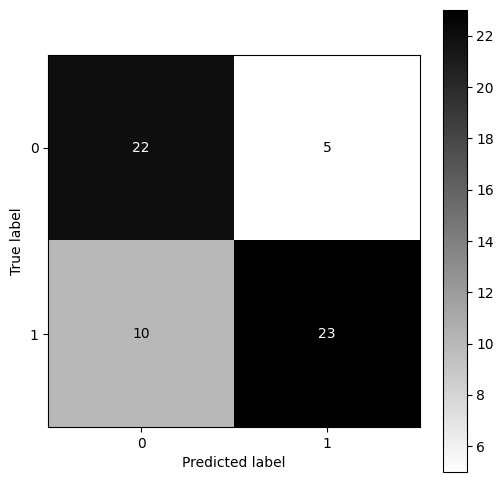

In [29]:
xpandas = cleveland.drop(columns=['Class', 'Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'Restecg', 'Exang', 'Slope'])
xtrain, xtest, ytrain, ytest = train_test_split(xpandas, y, test_size=0.2, train_size=0.8, random_state=seed)
xtrain = (xtrain - xtrain.min())/(xtrain.max()-xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max()-xtest.min())
ytest[ytest == 0] = -1
ytrain[ytrain == 0] = -1
model = linear_model.RidgeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)
tnskl, fpskl, fnskl, tpskl = confusion_matrix(ytest, ypred).ravel()
cm[0,0] = tpskl
cm[1,0] = fpskl
cm[0,1] = fnskl
cm[1,1] = tnskl
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot(cmap='binary')
plt.show()

<h3 align="center"><font size="10">Confusion matrix of manually selected features in analytical model</font></h3>

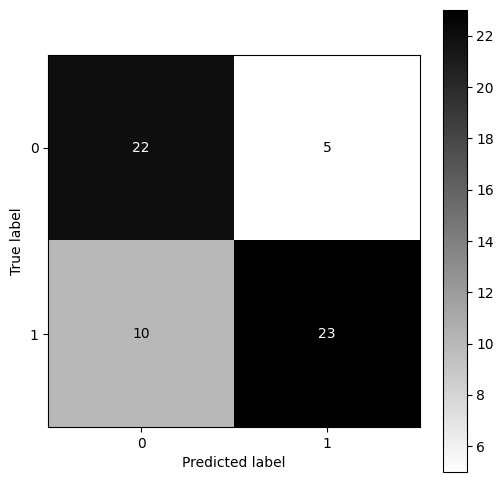

In [30]:
intercepts = np.ones((len(xtrain), 1))
newintercepts = np.c_[intercepts, xtrain]
I = np.identity(newintercepts.shape[1])
I[0][0] = 0
theta = np.linalg.pinv(newintercepts.T.dot(newintercepts) + I).dot(newintercepts.T).dot(ytrain)
xtestdomacierzy = np.c_[np.ones((xtest.shape[0],1)),xtest]
theta = theta.reshape((5,1))
ypredicted = np.sum(xtestdomacierzy @ theta, axis=1)
labeled=[]
for x in ypredicted:
    if x >= 0:
        labeled.append(1.0)
    else:
        labeled.append(-1.0)
cmanalytical = confusion_matrix(ytest, labeled)
tnanal, fpanal, fnanal, tpanal = confusion_matrix(ytest, labeled).ravel()
cmanalytical[0,0] = tpanal
cmanalytical[1,0] = fpanal
cmanalytical[0,1] = fnanal
cmanalytical[1,1] = tnanal
cmanalytical = ConfusionMatrixDisplay(confusion_matrix=cmanalytical)
cmanalytical.plot(cmap='binary')
plt.show()

<h3 align="center"><font size="10">Confusion matrix of sfs-selected features in sklearn model</font></h3>

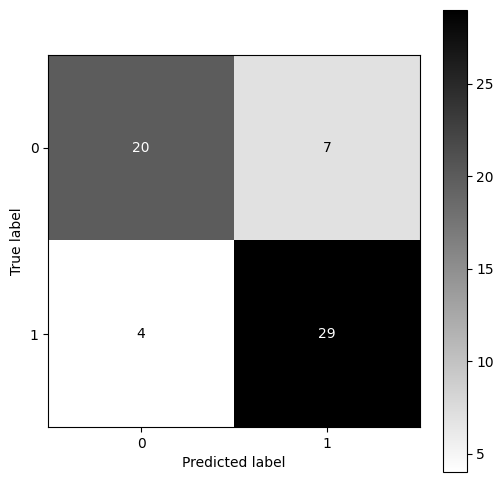

In [31]:
xsfs = cleveland[['CP', 'Exang', 'Ca', 'Thal']]
xtrain, xtest, ytrain, ytest = train_test_split(xsfs, y, test_size=0.2, train_size=0.8, random_state=seed)
xtrain = (xtrain - xtrain.min())/(xtrain.max()-xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max()-xtest.min())
ytest[ytest == 0] = -1
ytrain[ytrain == 0] = -1
model = linear_model.RidgeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)
tnskl, fpskl, fnskl, tpskl = confusion_matrix(ytest, ypred).ravel()
cm[0,0] = tpskl
cm[1,0] = fpskl
cm[0,1] = fnskl
cm[1,1] = tnskl
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot(cmap='binary')
plt.show()

<h3 align="center"><font size="10">Confusion matrix of sfs-selected features in analytical model</font></h3>

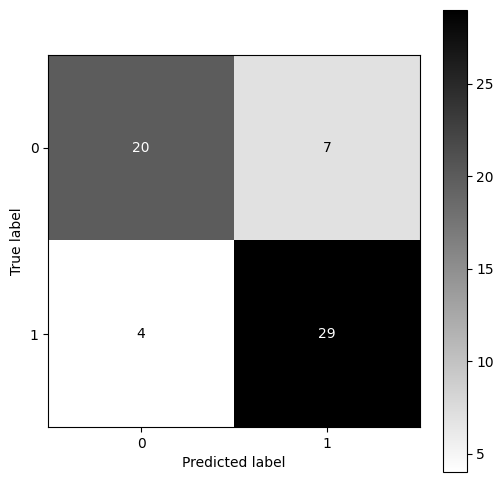

In [32]:
intercepts = np.ones((len(xtrain), 1))
newintercepts = np.c_[intercepts, xtrain]
I = np.identity(newintercepts.shape[1])
I[0][0] = 0
theta = np.linalg.pinv(newintercepts.T.dot(newintercepts) + I).dot(newintercepts.T).dot(ytrain)
xtestdomacierzy = np.c_[np.ones((xtest.shape[0],1)),xtest]
theta = theta.reshape((5,1))
ypredicted = np.sum(xtestdomacierzy @ theta, axis=1)
labeled=[]
for x in ypredicted:
    if x >= 0:
        labeled.append(1.0)
    else:
        labeled.append(-1.0)
cmanalytical = confusion_matrix(ytest, labeled)
tnanal, fpanal, fnanal, tpanal = confusion_matrix(ytest, labeled).ravel()
cmanalytical[0,0] = tpanal
cmanalytical[1,0] = fpanal
cmanalytical[0,1] = fnanal
cmanalytical[1,1] = tnanal
cmanalytical = ConfusionMatrixDisplay(confusion_matrix=cmanalytical)
cmanalytical.plot(cmap='binary')
plt.show()